In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import cluster
import os
import re
os.getcwd()

'c:\\Users\\dscshap3821\\dws'

In [201]:
df = pd.read_csv('./dws_dsc_wh_ou_daily_kpi_july.csv')
# df.dropna(axis = 1, inplace = True, how = 'all')
# re1 = re.compile(r'(?<=\.).+')
# df.columns = [re1.findall(i)[0] for i in list(df.columns.to_numpy())]
# df.to_csv('./dws_dsc_wh_ou_daily_kpi_july.csv', encoding='utf_8_sig')

In [202]:
df.columns

Index(['Unnamed: 0', 'ou_code', 'ou_name', 'bg_code', 'bg_name_cn',
       'customer_id', 'customer_name', 'total_storage_location_count',
       'operation_day', 'week', 'month', 'quarter', 'year', 'is_holiday',
       'inbound_header_count', 'inbound_line_count',
       'inbound_line_original_qty', 'inbound_receive_qty',
       'inbound_receive_volume', 'inbound_receive_weight',
       'outbound_header_count', 'outbound_line_count',
       'outbound_line_original_qty', 'outbound_shipped_qty',
       'outbound_shipped_volume', 'outbound_shipped_weight',
       'outbound_std_shipped_volume', 'outbound_std_shipped_weight',
       'used_storage_location_count', 'active_lpn_count', 'on_hand_qty',
       'in_transit_qty', 'allocated_qty', 'total_head_count',
       'total_working_hour', 'outsource_working_hour', 'perm_working_hour',
       'other_working_hour', 'direct_working_hour', 'indirect_working_hour',
       'outbound_inbound_qty_ratio', 'perm_working_hour_ratio',
       'working_ho

<AxesSubplot:xlabel='operation_day', ylabel='Count'>

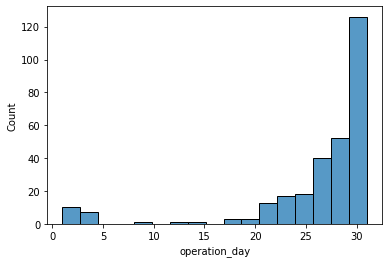

In [203]:
# sns.histplot(df.groupby('ou_code')['operation_day'].nunique())

In [204]:
clean_df1 = (df.groupby('ou_code')['operation_day'].count() < 18).reset_index()
clean_df1.columns = ['ou_code', 'flag1']
df = clean_df1.merge(df, on = 'ou_code', how = 'inner')
df = df[df['flag1'] == False]

In [205]:
clean_df2 = df.groupby('ou_code')[[
    'inbound_receive_qty', 'outbound_shipped_qty'
    ]].sum().reset_index()
clean_df2['sum'] = clean_df2.sum(axis = 1)
clean_df2 = clean_df2[clean_df2['sum'] != 0]
df = df[df['ou_code'].isin(clean_df2.ou_code)]

In [206]:
clean_df3 = (df.groupby('ou_code')[[
    'total_working_hour'
    ]].sum() == 0).reset_index()
clean_df3 = clean_df3[clean_df3['total_working_hour'] == False]
df = df[df['ou_code'].isin(clean_df3.ou_code)]
df= df.reset_index()

In [207]:
df = df[[
    'ou_code','operation_day', 'inbound_receive_qty', 'is_holiday',
    'outbound_shipped_qty','total_head_count','total_working_hour',
    'outsource_working_hour', 'perm_working_hour',
    'other_working_hour', 'direct_working_hour', 'indirect_working_hour',
    'outbound_inbound_qty_ratio', 'perm_working_hour_ratio',
    'working_hour_per_head', 'location_usage_rate', 'location_idle_rate']]
df = df.fillna(0)

In [208]:
# df.groupby('ou_code')['operation_day'].nunique().max()
ou_codes = df['ou_code'].unique()

In [212]:
df

,ou_code,operation_day,inbound_receive_qty,is_holiday,outbound_shipped_qty,total_head_count,total_working_hour,outsource_working_hour,perm_working_hour,other_working_hour,direct_working_hour,indirect_working_hour,outbound_inbound_qty_ratio,perm_working_hour_ratio,working_hour_per_head,location_usage_rate,location_idle_rate
0,CN-001,20210724,0.0,1,0.0,1.0,9.50,0.0,9.50,0.0,9.50,0.0,0.000000,1.0,9.500000,0.140815,0.859185
1,CN-001,20210723,63898.0,0,424.0,4.0,34.72,0.0,34.72,0.0,34.72,0.0,0.006636,1.0,8.680000,0.140815,0.859185
2,CN-001,20210715,44561.0,0,5347.0,4.0,32.80,0.0,32.80,0.0,32.80,0.0,0.119993,1.0,8.200000,0.114252,0.885748
3,CN-001,20210708,23640.0,0,14313.0,3.0,24.50,0.0,24.50,0.0,24.50,0.0,0.605457,1.0,8.166667,0.029870,0.970130
4,CN-001,20210707,23881.0,0,0.0,4.0,33.55,0.0,33.55,0.0,33.55,0.0,0.000000,1.0,8.387500,0.017282,0.982718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,CN-432,20210721,62.0,0,171.0,1.0,8.27,0.0,8.27,0.0,8.27,0.0,2.758065,1.0,8.270000,0.249046,0.750954
1877,CN-432,20210716,385.0,0,283.0,1.0,8.68,0.0,8.68,0.0,8.68,0.0,0.735065,1.0,8.680000,0.250136,0.749864
1878,CN-432,20210730,294.0,0,320.0,1.0,8.93,0.0,8.93,0.0,8.93,0.0,1.088435,1.0,8.930000,0.247411,0.752589
1879,CN-432,20210715,2.0,0,100.0,1.0,8.00,0.0,8.00,0.0,8.00,0.0,50.000000,1.0,8.000000,0.250000,0.750000


In [280]:

def mnb_kmeans_in(ou_code):
        """
        mini batch kmeans, inbound, outbound, working hour data.
        """
        alg1 = cluster.MiniBatchKMeans(n_clusters = 4, random_state = 529)
        df_fin = pd.DataFrame()
        df_sub = df[df['ou_code'] == ou_code][['ou_code', 'operation_day', 'inbound_receive_qty']]        
        df_fin = df_fin.append(df_sub[df_sub['inbound_receive_qty'] == 0])
        df_fin['kernal_core1' ] = -1
        df_fin['kernal_value1'] = 0
        df_rec = df_sub[df_sub['inbound_receive_qty'] != 0]      
        hist1 = alg1.fit(np.reshape(list(df_rec['inbound_receive_qty']), (-1,1)))

        df_rec['kernal_core1'] = hist1.labels_
        cl_1 = pd.concat(
                [pd.DataFrame(hist1.cluster_centers_), pd.Series(np.arange(0,4))], axis = 1
                )
        
        cl_1.columns = ['kernal_value1', 'kernal_core1']

        df_rec = df_rec.merge(
                cl_1, on = 'kernal_core1', how = 'inner'
                )
        df_fin = df_fin.append(df_rec).reset_index().drop(['index'], axis = 1)
        df_fin['kind'] = 'inbound'
        return df_fin


def mnb_kmeans_out(ou_code):
        alg1 = cluster.MiniBatchKMeans(n_clusters = 4, random_state = 707)
        df_fin = pd.DataFrame()
        df_sub = df[df['ou_code'] == ou_code][['ou_code', 'operation_day', 'outbound_shipped_qty']]        
        df_fin = df_fin.append(df_sub[df_sub['outbound_shipped_qty'] == 0])
        df_fin['kernal_core2' ] = -1
        df_fin['kernal_value2'] = 0
        df_rec = df_sub[df_sub['outbound_shipped_qty'] != 0]

        hist1 = alg1.fit(np.reshape(list(df_rec['outbound_shipped_qty']), (-1,1)))

        df_rec['kernal_core2'] = hist1.labels_
        cl_1 = pd.concat(
                [pd.DataFrame(hist1.cluster_centers_), pd.Series(np.arange(0,4))], axis = 1
                )
        
        cl_1.columns = ['kernal_value2', 'kernal_core2']

        df_rec = df_rec.merge(
                cl_1, on = 'kernal_core2', how = 'inner'
                )
        df_fin = df_fin.append(df_rec).reset_index().drop(['index'], axis = 1)
        df_fin['kind'] = 'outbound'
        return df_fin


def mnb_kmeans_hr(ou_code):
        alg1 = cluster.MiniBatchKMeans(n_clusters = 4, random_state = 5290707)
        df_fin = pd.DataFrame()
        df_sub = df[df['ou_code'] == ou_code][['ou_code', 'operation_day', 'total_working_hour']]        
        df_fin = df_fin.append(df_sub[df_sub['total_working_hour'] == 0])
        df_fin['kernal_core3' ] = -1
        df_fin['kernal_value3'] = 0
        df_rec = df_sub[df_sub['total_working_hour'] != 0]

        hist1 = alg1.fit(np.reshape(list(df_rec['total_working_hour']), (-1,1)))

        df_rec['kernal_core3'] = hist1.labels_
        cl_1 = pd.concat(
                [pd.DataFrame(hist1.cluster_centers_), pd.Series(np.arange(0,4))], axis = 1
                )
        
        cl_1.columns = ['kernal_value3', 'kernal_core3']

        df_rec = df_rec.merge(
                cl_1, on = 'kernal_core3', how = 'inner'
                )
        df_fin = df_fin.append(df_rec).reset_index().drop(['index'], axis = 1)
        df_fin['kind'] = 'working_hour'
        return df_fin

   

   

In [281]:
mnb_kmeans_in('CN-432')

<ipython-input-280-bc10d0938059>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['kernal_core1'] = hist1.labels_


,ou_code,operation_day,inbound_receive_qty,kernal_core1,kernal_value1,kind
0,CN-432,20210705,0.0,-1,0.000000,inbound
1,CN-432,20210708,0.0,-1,0.000000,inbound
2,CN-432,20210714,0.0,-1,0.000000,inbound
3,CN-432,20210718,0.0,-1,0.000000,inbound
4,CN-432,20210731,0.0,-1,0.000000,inbound
5,CN-432,20210717,0.0,-1,0.000000,inbound
6,CN-432,20210724,0.0,-1,0.000000,inbound
7,CN-432,20210725,0.0,-1,0.000000,inbound
8,CN-432,20210701,0.0,-1,0.000000,inbound
9,CN-432,20210709,1.0,0,10.022676,inbound


In [282]:
random_state = 5290707

In [199]:
df_out = df[['inc_day', 'shipped_qty']].dropna(subset = ['shipped_qty'])
alg1 = cluster.MiniBatchKMeans(n_clusters = 3, random_state = 707)
hist1 = alg1.fit(np.reshape(list(df_out['shipped_qty']), (-1,1)))

df_out['cluster_centers_out'] = hist1.labels_
cl_1 = pd.concat(
        [pd.DataFrame(hist1.cluster_centers_), pd.Series(np.arange(0,3))], 
        axis = 1)
cl_1.columns = ['cluster_values_out', 'cluster_centers_out']

df_out = df_out.merge(
        cl_1, on = 'cluster_centers_out', how = 'inner')

,ou_code,operation_day,inbound_receive_qty,is_holiday,outbound_shipped_qty,total_head_count,total_working_hour,outsource_working_hour,perm_working_hour,other_working_hour,direct_working_hour,indirect_working_hour,outbound_inbound_qty_ratio,perm_working_hour_ratio,working_hour_per_head,location_usage_rate,location_idle_rate
0,CN-001,20210724,0.0,1,0.0,1.0,9.50,0.0,9.50,0.0,9.50,0.0,0.000000,1.0,9.500000,0.140815,0.859185
1,CN-001,20210723,63898.0,0,424.0,4.0,34.72,0.0,34.72,0.0,34.72,0.0,0.006636,1.0,8.680000,0.140815,0.859185
2,CN-001,20210715,44561.0,0,5347.0,4.0,32.80,0.0,32.80,0.0,32.80,0.0,0.119993,1.0,8.200000,0.114252,0.885748
3,CN-001,20210708,23640.0,0,14313.0,3.0,24.50,0.0,24.50,0.0,24.50,0.0,0.605457,1.0,8.166667,0.029870,0.970130
4,CN-001,20210707,23881.0,0,0.0,4.0,33.55,0.0,33.55,0.0,33.55,0.0,0.000000,1.0,8.387500,0.017282,0.982718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,CN-432,20210721,62.0,0,171.0,1.0,8.27,0.0,8.27,0.0,8.27,0.0,2.758065,1.0,8.270000,0.249046,0.750954
1877,CN-432,20210716,385.0,0,283.0,1.0,8.68,0.0,8.68,0.0,8.68,0.0,0.735065,1.0,8.680000,0.250136,0.749864
1878,CN-432,20210730,294.0,0,320.0,1.0,8.93,0.0,8.93,0.0,8.93,0.0,1.088435,1.0,8.930000,0.247411,0.752589
1879,CN-432,20210715,2.0,0,100.0,1.0,8.00,0.0,8.00,0.0,8.00,0.0,50.000000,1.0,8.000000,0.250000,0.750000


In [176]:
# data process 1

---

In [14]:
pd.read_csv('./inb_outb_wh_MNKmeans5.csv')[
    ['working_date', 'working_hours', 'inbound_ttl_qty','shipped_qty']]

,working_date,working_hours,inbound_ttl_qty,shipped_qty
0,20210607,66.25,0,12
1,20210608,71.85,0,417
2,20210609,66.66,0,1733
3,20210610,69.53,0,6630
4,20210611,77.10,2,16797
5,20210612,46.19,0,11458
6,20210615,67.29,0,7790
7,20210616,73.53,65,13173
8,20210617,66.15,40,15614
9,20210618,68.91,123,7750


---

In [205]:
# np.std(june_hpwh.groupby(['inc_day'])['shipped_qty'].count())
# df_shipped_qty[abs(df_shipped_qty) < np.mean(df_shipped_qty) - 124.40536340706716]

In [289]:
alg1 = cluster.MiniBatchKMeans(n_clusters = 3, random_state = 707)
hist1 = alg1.fit(df_shipped_qty['shipped_qty'].to_numpy().reshape(-1,1))
# df_shipped_qty = pd.DataFrame(df_shipped_qty).reset_index()

In [292]:
[hist1.labels_, alg1.labels_]

[array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 2, 2, 2, 2, 2, 2])]

In [207]:
df_shipped_qty['cluster_centers'] = alg1.labels_

In [208]:
# df_shipped_qty['cluster_centers'] = alg1.labels_
cl_1 = pd.concat([pd.DataFrame(hist1.cluster_centers_), pd.Series(np.arange(0,3))], axis = 1)
cl_1.columns = ['cluster_values', 'cluster_centers']

In [209]:
df_shipped_qty = df_shipped_qty.merge(cl_1, on = 'cluster_centers', how = 'inner')

In [272]:
alg1.fit(np.reshape(list(df_shipped_qty['shipped_qty']), (-1,1)))


# np.reshape(list(df_shipped_qty['shipped_qty']), (-1,1))

MiniBatchKMeans(n_clusters=3, random_state=23)

-----
## inb

In [210]:
june_hpwh2 = pd.read_csv('./inb_oub_lab/inb_june_hpi_wh.csv')
june_hpwh2.dropna(axis = 1, inplace = True, how = 'all')
june_hpwh2.columns = june_hpwh2.columns.to_series().str.slice(31).values


In [211]:
data_june_in = pd.DataFrame(june_hpwh2.groupby(['inc_day'])['receive_qty'].sum()).reset_index()

In [67]:
# data_jly_in = pd.read_clipboard(header = None)

In [212]:
data_june_in = pd.concat([data_june_in, all_favck2.loc[:,['inc_day', 'receive_qty']]], axis = 0).fillna(0).reset_index()

In [213]:
# data_jly_in.columns = data_june_in.columns


In [214]:
data_june_in = data_june_in.drop(['index'], axis = 1)

In [215]:
data_june_in

,inc_day,receive_qty
0,20210611,2.0
1,20210616,65.0
2,20210617,40.0
3,20210618,123.0
4,20210621,2025.0
5,20210622,12453.0
6,20210623,1530.0
7,20210624,20089.0
8,20210625,20653.0
9,20210628,11190.0


In [216]:
# alg1 = KMeans(n_clusters = 3)
hist2 = alg1.fit(data_june_in['receive_qty'].to_numpy().reshape(-1,1))

In [217]:
cl_2 = pd.concat([pd.DataFrame(hist2.cluster_centers_), pd.Series(np.arange(0,3))], axis = 1)
cl_2.columns = ['cluster_values', 'cluster_centers']

df_receive_qty = pd.concat(
    [data_june_in,
    pd.Series(hist2.labels_)], axis = 1, ignore_index = True)
df_receive_qty.columns = ['inc_day', 'inbound_ttl_qty', 'cluster_centers']

In [218]:
df_receive_qty = df_receive_qty.merge(cl_2, on = 'cluster_centers', how = 'inner')

In [219]:
df_receive_qty = df_receive_qty.sort_values(by = ['inc_day'])

In [220]:
df_receive_qty

,inc_day,inbound_ttl_qty,cluster_centers,cluster_values
0,20210611,2.0,1,1350.027322
1,20210616,65.0,1,1350.027322
2,20210617,40.0,1,1350.027322
3,20210618,123.0,1,1350.027322
4,20210621,2025.0,1,1350.027322
18,20210622,12453.0,2,10663.491228
5,20210623,1530.0,1,1350.027322
26,20210624,20089.0,0,21087.387097
27,20210625,20653.0,0,21087.387097
19,20210628,11190.0,2,10663.491228


---
## hrr

In [221]:
# hr data
june_hr = pd.read_csv('./inb_oub_lab/hr_workingHour.csv')
june_hr.dropna(axis = 1, inplace = True, how = 'all')
june_hr.columns =  june_hr.columns.to_series().str.slice(31).values
june_hr['working_date'] = june_hr['working_date'].str.slice(0, -9).values

In [222]:
june_hr_hc = june_hr[june_hr['working_hours'] != 0].groupby(['working_date'])['emp_name'].count()
june_hr_new = june_hr.groupby(['working_date'])['working_hours'].sum()

In [223]:
june_hr_hc = pd.DataFrame(june_hr_hc).reset_index()
# june_hr_hc = june_hr_hc[june_hr_hc['working_date']]


june_hr_new = pd.DataFrame(june_hr_new).reset_index()
# june_hr_new = june_hr_new[june_hr_new['working_date']]

In [224]:
alg1 = cluster.MiniBatchKMeans(n_clusters = 3, random_state = 23)
hist3 = alg1.fit(june_hr_new['working_hours'].to_numpy().reshape(-1,1))
hr_cluster_centers = pd.DataFrame(hist3.cluster_centers_)
hr_cluster_centers['cc_hr'] = [0,1,2]


In [225]:
june_hr_new['cc_hr'] = hist3.labels_

In [226]:
june_hr_ttl = june_hr_new.merge(june_hr_hc, on = 'working_date', how = 'left').fillna(0)
june_hr_ttl['working_date'] = [int(i.replace('-', '')) for i in pd.to_datetime(june_hr_ttl['working_date']).astype(str)]

In [227]:
# values = pd.concat([june_hr_ttl.groupby(['cc_hr'])['working_hours'].std(), 
# june_hr_ttl.groupby(['cc_hr'])['working_hours'].median(),
# june_hr_ttl.groupby(['cc_hr'])['working_hours'].mean()], axis = 1).reset_index()
# values.columns = ['cc_hr','std_cc_hr', 'median_cc_hr', 'mean_cc_hr']

In [228]:
# june_hr_ttl = june_hr_ttl.merge(values, on = 'cc_hr', how = 'left')
june_hr_ttl = june_hr_ttl.merge(hr_cluster_centers, on = 'cc_hr', how = 'left')

In [229]:
full = june_hr_ttl.merge(
    df_receive_qty, left_on = 'working_date', right_on = 'inc_day',
    how = 'left').fillna(0)
full = full.merge(
    df_shipped_qty, left_on = 'working_date', right_on = 'inc_day', 
    how = 'left',suffixes=('_x', '_y')).fillna(0)


full = full.drop(['inc_day_x', 'inc_day_y'], axis = 1)
full = pd.DataFrame(full)

In [230]:
full = full.rename({'emp_name' : 'hc', 'cluster_centers_x': 'inb_cc', 
        'cluster_values_x' : 'inb_cv', 'cluster_centers_y' : 'outb_cc',
        'cluster_values_y' :  'outb_cv', 0 : 'cluster_center_working_hour'}, axis = 1)

In [231]:
full

,working_date,working_hours,cc_hr,hc,cluster_center_working_hour,inbound_ttl_qty,inb_cc,cluster_values,level_0,index,shipped_qty,outb_cc,inb_cv,outb_cv
0,20210606,26.55,2,3.0,40.717840,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,20210607,66.25,0,8.0,69.198605,0.0,0.0,0.000000,0.0,0.0,12.0,2.0,2576.617331,2043.990220
2,20210608,71.85,0,8.0,69.198605,0.0,0.0,0.000000,1.0,1.0,417.0,2.0,2576.617331,2043.990220
3,20210609,66.66,0,8.0,69.198605,0.0,0.0,0.000000,2.0,2.0,1733.0,2.0,2576.617331,2043.990220
4,20210610,69.53,0,8.0,69.198605,0.0,0.0,0.000000,3.0,3.0,6630.0,0.0,2576.617331,9990.731278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,20210718,0.00,1,0.0,0.725044,0.0,1.0,1350.027322,5.0,0.0,0.0,2.0,0.000000,2043.990220
58,20210719,42.95,2,5.0,40.717840,4286.0,1.0,1350.027322,20.0,16.0,4286.0,2.0,2576.617331,2043.990220
59,20210719,42.95,2,5.0,40.717840,4286.0,1.0,1350.027322,16.0,0.0,10530.0,0.0,0.000000,9990.731278
60,20210720,0.00,1,0.0,0.725044,1592.0,1.0,1350.027322,11.0,4.0,1592.0,2.0,2576.617331,2043.990220


---

In [232]:
# hr['working_date'] = pd.to_datetime(hr['working_date'])
# hr['working_date'] = hr['working_date'].astype(str)
# hr['working_date'] = [i.replace('-', '') for i in hr['working_date']]
# inb['close_date'] = inb['close_date'].astype(str)
# out['inc_day'] = out['inc_day'].astype(str)
# # 

# mm1 = inb.merge(out, how = 'outer', left_on = 'close_date', right_on = 'inc_day')
# mm2 = hr.merge(mm1, how = 'outer', left_on = 'working_date', right_on = 'inc_day').to_csv('./mm1.csv', index = None)

----

In [233]:
mm2 = full

In [234]:
value_set = (df_receive_qty['inc_day'].astype(str).append(df_shipped_qty['inc_day'].astype(str)).reset_index())
no_value_set = np.setdiff1d(june_hr_ttl['working_date'].astype(str), value_set['inc_day'])

In [235]:
dates = list(no_value_set.astype(int))


In [236]:
# np.setdiff1d(mm2['working_date'],dates)
mm_not_null = mm2.loc[mm2['working_date'].isin(np.setdiff1d(mm2['working_date'],dates))]
mm_null = mm2.loc[~mm2['working_date'].isin(np.setdiff1d(mm2['working_date'],dates))]

In [237]:
mm3 = pd.DataFrame(mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].max()).reset_index()
mm4 = pd.DataFrame(mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].min()).reset_index()
mm3 = mm3.rename({'working_hours': 'working_hours_max'}, axis = 1)
mm4 = mm4.rename({'working_hours': 'working_hours_min'}, axis = 1)

mm5 = pd.DataFrame(mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].max()).reset_index()
mm6 = pd.DataFrame(mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].min()).reset_index()
mm5 = mm5.rename({'working_hours': 'working_hours_max'}, axis = 1)
mm6 = mm6.rename({'working_hours': 'working_hours_min'}, axis = 1)




In [238]:
mm_summary = mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].median().reset_index().merge(
        mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].mean().reset_index(),
    on =['inb_cc', 'outb_cc'] ,how = 'inner'
    ).merge(
        mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.75).reset_index(),
        on =['inb_cc', 'outb_cc'] ,how = 'inner'
    ).merge(
        mm_not_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.6666).reset_index(), 
        on =['inb_cc', 'outb_cc'] ,how = 'inner'
    )

mm_summary.columns = ['inb_cc', 'outb_cc', 'working_hours_median', 'working_hours_mean', 'quantile_75', 'quantile_66']

mm_summary2 = mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].median().reset_index().merge(
        mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].mean().reset_index(),
    on =['inb_cc', 'outb_cc'] ,how = 'inner'
    ).merge(
        mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.75).reset_index(),
        on =['inb_cc', 'outb_cc'] ,how = 'inner'
    ).merge(
        mm_null.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.6666).reset_index(), 
        on =['inb_cc', 'outb_cc'] ,how = 'inner'
    )
    
mm_summary2.columns = ['inb_cc', 'outb_cc', 'working_hours_median', 'working_hours_mean', 'quantile_75', 'quantile_66']

In [239]:
mm_summary

,inb_cc,outb_cc,working_hours_median,working_hours_mean,quantile_75,quantile_66
0,0.0,0.0,67.290,61.003333,68.4100,68.036368
1,0.0,1.0,72.130,72.130000,74.1250,73.459468
2,0.0,2.0,67.995,68.848333,70.9225,69.375430
3,1.0,0.0,66.150,57.930000,69.3200,69.046448
4,1.0,1.0,61.470,57.740000,72.6675,71.186112
5,1.0,2.0,36.935,32.923750,66.1725,64.727010
6,2.0,0.0,67.080,68.455000,68.8875,67.882530
7,2.0,1.0,72.765,72.765000,73.3825,73.176502
8,2.0,2.0,67.210,67.560000,68.1250,67.669816


In [240]:
mm_not_null = mm_not_null.merge(mm3, how = 'left', on = ['inb_cc','outb_cc'])
mm_not_null = mm_not_null.merge(mm4, how = 'left', on = ['inb_cc','outb_cc'])
mm_not_null = mm_not_null.merge(mm_summary, how = 'left', on = ['inb_cc','outb_cc'])

mm_null = mm_null.merge(mm5, how = 'left', on = ['inb_cc','outb_cc'])
mm_null = mm_null.merge(mm6, how = 'left', on = ['inb_cc','outb_cc'])
mm_null = mm_null.merge(mm_summary2, how = 'left', on = ['inb_cc','outb_cc'])

In [241]:
mm_not_null['dis_to_kernel'] = (mm_not_null['working_hours'] - mm_not_null['cluster_center_working_hour'])
mm_null['dis_to_kernel'] = (mm_null['working_hours'] - mm_null['cluster_center_working_hour'])

In [242]:
mm2 = pd.concat([mm_not_null, mm_null], axis = 0)

In [243]:
mm2 = mm2.rename({'std_cc_hr': 'working_hours_std',  
            'median_cc_hr': 'working_hours_median', 
            'mean_cc_hr': 'working_hours_mean'}, axis = 1)

In [244]:
mm2

,working_date,working_hours,cc_hr,hc,cluster_center_working_hour,inbound_ttl_qty,inb_cc,cluster_values,level_0,index,...,outb_cc,inb_cv,outb_cv,working_hours_max,working_hours_min,working_hours_median,working_hours_mean,quantile_75,quantile_66,dis_to_kernel
0,20210607,66.25,0,8.0,69.198605,0.0,0.0,0.000000,0.0,0.0,...,2.0,2576.617331,2043.990220,72.34,66.25,67.995,68.848333,70.9225,69.375430,-2.948605
1,20210608,71.85,0,8.0,69.198605,0.0,0.0,0.000000,1.0,1.0,...,2.0,2576.617331,2043.990220,72.34,66.25,67.995,68.848333,70.9225,69.375430,2.651395
2,20210609,66.66,0,8.0,69.198605,0.0,0.0,0.000000,2.0,2.0,...,2.0,2576.617331,2043.990220,72.34,66.25,67.995,68.848333,70.9225,69.375430,-2.538605
3,20210610,69.53,0,8.0,69.198605,0.0,0.0,0.000000,3.0,3.0,...,0.0,2576.617331,9990.731278,69.53,46.19,67.290,61.003333,68.4100,68.036368,0.331395
4,20210611,77.10,0,8.0,69.198605,2.0,1.0,1350.027322,21.0,4.0,...,1.0,11663.428741,22298.949020,77.10,30.92,61.470,57.740000,72.6675,71.186112,7.901395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,20210626,0.00,1,0.0,0.725044,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,26.55,0.00,0.000,3.555000,0.0000,0.000000,-0.725044
6,20210627,0.00,1,0.0,0.725044,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,26.55,0.00,0.000,3.555000,0.0000,0.000000,-0.725044
7,20210704,0.00,1,0.0,0.725044,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,26.55,0.00,0.000,3.555000,0.0000,0.000000,-0.725044
8,20210710,0.00,1,0.0,0.725044,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,26.55,0.00,0.000,3.555000,0.0000,0.000000,-0.725044


In [245]:
mm2['year'] = mm2['working_date'].astype(str).str.slice(0,4)
mm2['month'] = mm2['working_date'].astype(str).str.slice(5,6)
mm2['date'] = mm2['working_date'].astype(str).str.slice(6,8)

mm2.to_csv('./inb_outb_wh_MNKmeans3.csv', index = False)

In [198]:
# mm_summary = mm2.groupby(['inb_cc', 'outb_cc'])['working_hours'].median().reset_index().merge(
#         mm2.groupby(['inb_cc', 'outb_cc'])['working_hours'].mean().reset_index(),
#     on =['inb_cc', 'outb_cc'] ,how = 'inner'
#     ).merge(
#         mm2.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.75).reset_index(),
#         on =['inb_cc', 'outb_cc'] ,how = 'inner'
#     ).merge(
#         mm2.groupby(['inb_cc', 'outb_cc'])['working_hours'].quantile(.6666).reset_index(), 
#         on =['inb_cc', 'outb_cc'] ,how = 'inner'
#     )

# mm2 = mm2.drop(['working_hours_median', 'working_hours_mean'], axis = 1)

# mm_summary.columns = ['inb_cc', 'outb_cc', 'working_hours_median', 'working_hours_mean', 'quantile_75', 'quantile_66']
# mm5 = mm2.merge(mm_summary, on = ['inb_cc', 'outb_cc'], how = 'inner')


In [633]:
pd.DataFrame(mm2.columns)

,0
0,working_date
1,working_hours
2,cc_hr
3,hc
4,cluster_center_working_hour
5,inbound_ttl_qty
6,inb_cc
7,inb_cv
8,shipped_qty
9,outb_cc


In [465]:
mm5.to_csv('./mm4.csv', index = False)

In [342]:
# mm2 = mm2.drop(['close_date', 'inc_day'], axis =  1)

In [345]:
# mm2['dis_to_kernel'] = (mm2['working_hours'] - mm2['cluster_kernal'])

In [424]:
(mm2.columns).to_numpy().reshape(-1,1)

array([['working_date'],
       ['working_hours'],
       ['cc_hr'],
       ['hc'],
       ['working_hours_std'],
       ['working_hours_median'],
       ['working_hours_mean'],
       ['cluster_center_working_hour'],
       ['inbound_ttl_qty'],
       ['inb_cc'],
       ['inb_cv'],
       ['shipped_qty'],
       ['outb_cc'],
       ['outb_cv'],
       ['working_hours_max'],
       ['working_hours_min'],
       ['dis_to_kernel']], dtype=object)